In [1]:
# from platform import python_version 
# print(python_version())

# Goal

View distr pixels of dset

# Imports

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Utilities
import os
import sys
import time
import pickle
from pathlib import Path

# regex
from re import search

# Input IO
import SimpleITK as sitk
import meshio

# path to tensor
from transforms import Path2Tensor

# Numpy and Pandas
import numpy as np
import pandas as pd
from pandas import DataFrame as DF

# Helper functions
from helpers.dset_info import get_terminal_folders, read_metadata_files, get_unique_df, get_iso_szs, get_range, print_unique, get_ext
from helpers.general   import lrange, sitk2np
from helpers.viz       import viz_axis

# Data Path

Set path to where data is stored.

In [4]:
# NYU
code_src    = "/gpfs/home/gologr01"
data_src    = "/gpfs/data/oermannlab/private_data/DeepPit"

# UMich 
# code src: "/home/labcomputer/Desktop/Rachel"
# data src: "../../../../..//media/labcomputer/e33f6fe0-5ede-4be4-b1f2-5168b7903c7a/home/rachel/"

In [5]:
# Paths to (1) code (2) data (3) saved models (4) saved metadata
deepPit_src = f"{code_src}/DeepPit"
obelisk_src = f"{code_src}/OBELISK"

# saved models, dset metadata
model_src   = f"{data_src}/saved_models"
save_loc    = f"{data_src}/saved_dset_metadata"

# dsets
dsets_src    = f"{data_src}/PitMRdata"

# print
print("Folders in dset src: ", end=""); print(*os.listdir(dsets_src), sep=", ")

Folders in dset src: ADNI1_full.zip, ABVIB_49_235.zip, AIBL_2-263.zip, ICMB, ABVIB (1).zip, central.xnat.org, ADNI, PPMI, Oasis_long, samir_labels, ACRIN-FMISO-Brain, LGG-1p19qDeletion, REMBRANDT, ICMB_1005-1297.zip, ABVIB_full.zip, AIBL_full.zip, AIBL, CPTAC-GBM, PPMI_3107-3326.zip, ADNI1_002_0023.zip, ICMB_full.zip, TCGA-LGG, PPMI_full.zip, ABVIB, ABIDE, AIBL.zip


In [6]:
# key,val = dset_name, path to top level dir
dset_dict = {
    "ABIDE"                  : f"{dsets_src}/ABIDE",
    "ABVIB"                  : f"{dsets_src}/ABVIB/ABVIB",
    "ADNI1_Complete_1Yr_1.5T": f"{dsets_src}/ADNI/ADNI1_Complete_1Yr_1.5T/ADNI",
    "AIBL"                   : f"{dsets_src}/AIBL/AIBL",
    "ICMB"                   : f"{dsets_src}/ICMB/ICBM",
    "PPMI"                   : f"{dsets_src}/PPMI/PPMI",
}

In [7]:
fnames = {}
for dset_name in dset_dict.keys():
    with open(f"{save_loc}/{dset_name}_fnames.txt", "rb") as f:
        fnames[dset_name] = pickle.load(f)

# Subsample

In [43]:
sample_size = 10

In [45]:
import glob
def get_nii(dir_name, las=False):
    niis = glob.glob(f"{dir_name}/*corrected_n4.nii") 
    if las:
        niis = [f for f in niis if f.endswith("las_corrected_n4.nii")]
    else:
        niis = [f for f in niis if not f.endswith("las_corrected_n4.nii")]
    return niis[0]

In [44]:
rand_sample = {k:np.random.choice(v, size=sample_size, replace=False) for k,v in fnames.items()}

In [46]:
rand_sample = {k:[get_nii(dir_path) for dir_path in v] for k,v in rand_sample.items()}

In [49]:
for k,v in rand_sample.items():
    print(k, len(v))

ABIDE 10
ABVIB 10
ADNI1_Complete_1Yr_1.5T 10
AIBL 10
ICMB 10
PPMI 10


# Viz

In [50]:
rand_mrs = {k:[Path2Tensor()(fn) for fn in v] for k,v in rand_sample.items()}

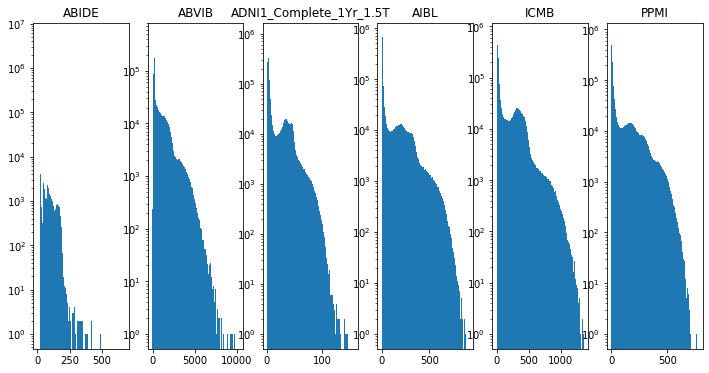

In [58]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(12,6))

idx = 0
for k,v in rand_mrs.items():
    axes[idx].hist(np.asarray(torch.cat([mr.reshape(-1,) for mr in v[:1]], dim=0)), bins='auto')
    axes[idx].set_yscale('log')
    axes[idx].set_title(k)
    idx += 1

In [59]:
import SimpleITK as sitk

In [60]:
sitk.OtsuThresholdImageFilter??

In [69]:
for k,v in rand_sample.items():
    print(k,v[0])

ABIDE /gpfs/data/oermannlab/private_data/DeepPit/PitMRdata/ABIDE/ABIDE/51130/MP-RAGE/2000-01-01_00_00_00.0/S165182/ABIDE_51130_MRI_MP-RAGE_br_raw_20120830213924539_S165182_I329192_corrected_n4.nii
ABVIB /gpfs/data/oermannlab/private_data/DeepPit/PitMRdata/ABVIB/ABVIB/1017/T1_SPGR/2012-03-27_09_45_10.0/S349928/corrected_n4.nii
ADNI1_Complete_1Yr_1.5T /gpfs/data/oermannlab/private_data/DeepPit/PitMRdata/ADNI/ADNI1_Complete_1Yr_1.5T/ADNI/037_S_0327/MPR-R__GradWarp__N3__Scaled/2006-11-15_10_01_31.0/S22548/corrected_n4.nii
AIBL /gpfs/data/oermannlab/private_data/DeepPit/PitMRdata/AIBL/AIBL/138/MPRAGE_ADNI_confirmed/2009-09-01_15_16_15.0/S86363/corrected_n4.nii
ICMB /gpfs/data/oermannlab/private_data/DeepPit/PitMRdata/ICMB/ICBM/UTHC_2003/MPRAGE_T1_AX_0.8_mm_TI-794/2009-02-24_15_19_08.0/S68993/corrected_n4.nii
PPMI /gpfs/data/oermannlab/private_data/DeepPit/PitMRdata/PPMI/PPMI/3380/MPRAGE_GRAPPA/2014-10-02_13_20_18.0/S234719/corrected_n4.nii


In [71]:
viz_axis(np_arr = mr, \
            bin_mask_arr   = seg,     color1 = "yellow",  alpha1=0.3, \
            bin_mask_arr2  = pred_mk, color2 = "magenta", alpha2=0.3, \
            slices=lrange(*bbox[0:2]), fixed_axis=0, \
            axis_fn = np.rot90, \
            title   = "Axis 0", \

            np_arr_b = mr, \
            bin_mask_arr_b   = seg,     color1_b = "yellow",  alpha1_b=0.3, \
            bin_mask_arr2_b  = pred_mk, color2_b = "magenta", alpha2_b=0.3, \
            slices_b = lrange(*bbox[2:4]), fixed_axis_b=1, \
            title_b  = "Axis 1", \

            np_arr_c = mr, \
            bin_mask_arr_c   = seg,     color1_c = "yellow",  alpha1_c=0.3, \
            bin_mask_arr2_c  = pred_mk, color2_c = "magenta", alpha2_c=0.3, \
            slices_c = lrange(*bbox[4:6]), fixed_axis_c=2, \
            title_c = "Axis 2", \
  
        ncols = 5, hspace=0.3, fig_mult=2)

In [83]:
def get_mid_idx(shape, nslices):
    nbefore = nslices//2
    nafter  = nslices - nbefore
    
    mids = [a//2 for a in shape]
    
    return [(m-nbefore, m+nafter) for m in mids]


In [91]:
for ds,mrs in rand_mrs.items():
    mr = np.asarray(mrs[0].reshape(-1,))
    print(f"{ds} {len(mr[mr>0]):e} {len(mr):e}")
    print(f"{ds} {len(mr[mr>1]):e} {len(mr):e}")
    print(f"{ds} {len(mr[mr>mr.mean()]):e} {len(mr):e}")
    print()

ABIDE 3.536046e+06 8.388608e+06
ABIDE 3.504385e+06 8.388608e+06
ABIDE 1.804862e+06 8.388608e+06

ABVIB 1.044049e+07 1.087898e+07
ABVIB 1.035505e+07 1.087898e+07
ABVIB 3.358471e+06 1.087898e+07

ADNI1_Complete_1Yr_1.5T 1.106509e+07 1.179648e+07
ADNI1_Complete_1Yr_1.5T 1.055018e+07 1.179648e+07
ADNI1_Complete_1Yr_1.5T 3.419909e+06 1.179648e+07

AIBL 9.576490e+06 9.830400e+06
AIBL 9.333899e+06 9.830400e+06
AIBL 2.860414e+06 9.830400e+06

ICMB 1.451413e+07 1.464320e+07
ICMB 1.447222e+07 1.464320e+07
ICMB 4.485464e+06 1.464320e+07

PPMI 1.048765e+07 1.081344e+07
PPMI 1.023054e+07 1.081344e+07
PPMI 3.200447e+06 1.081344e+07



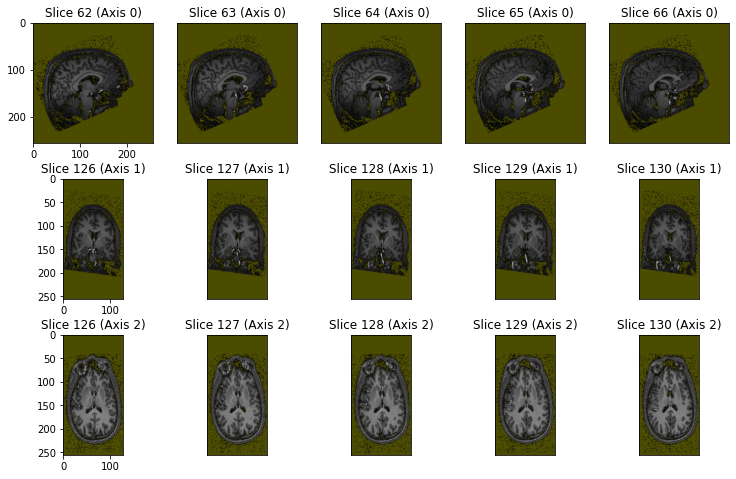

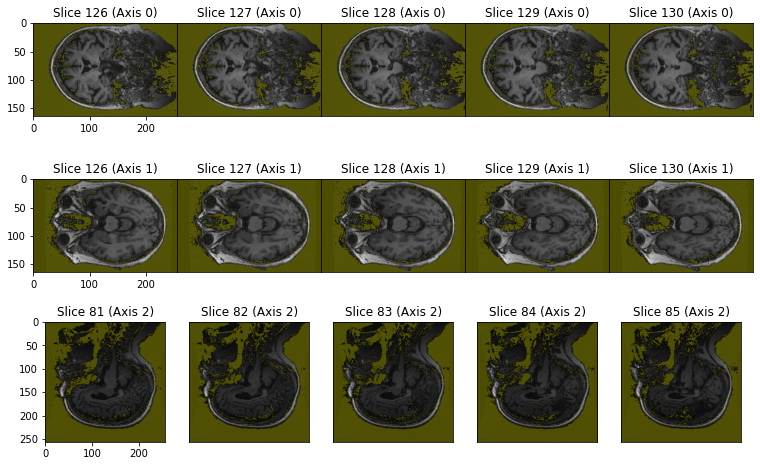

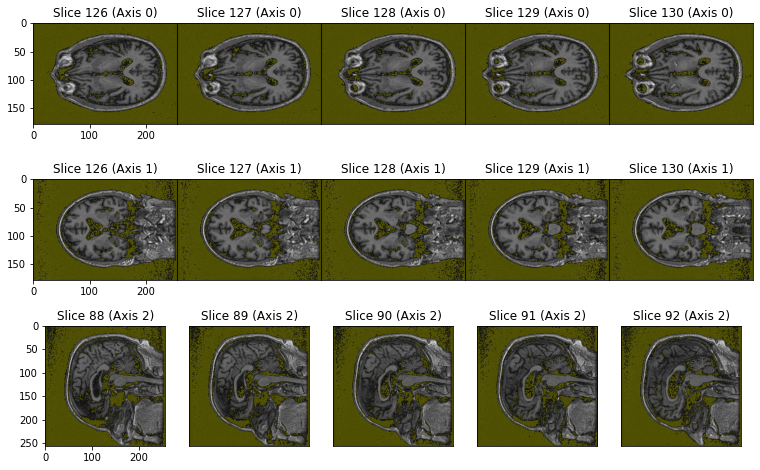

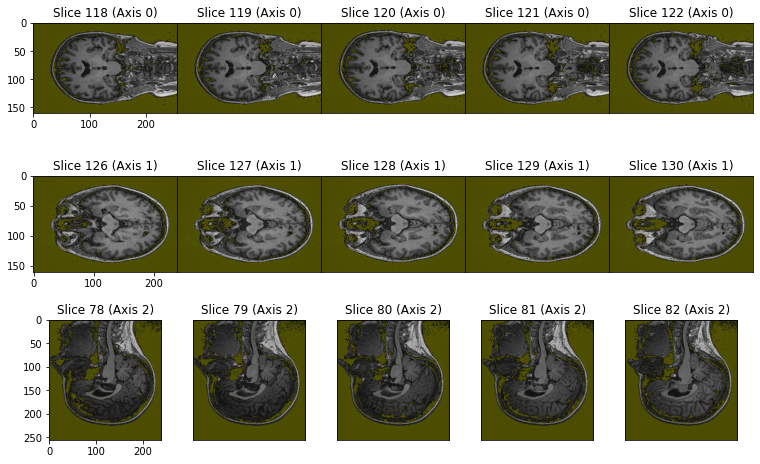

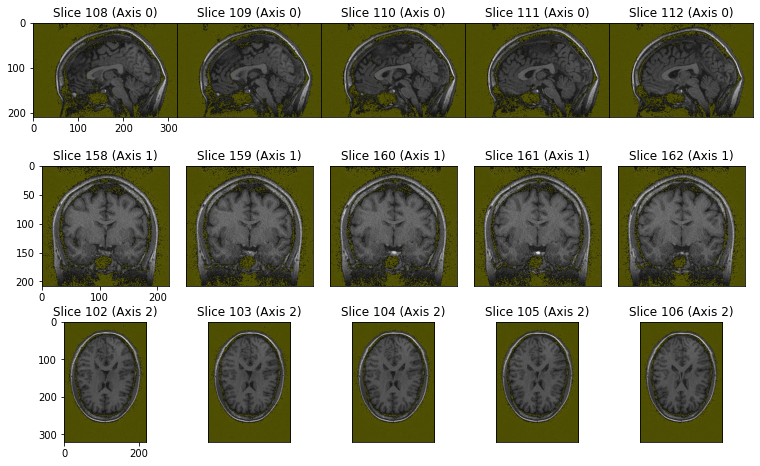

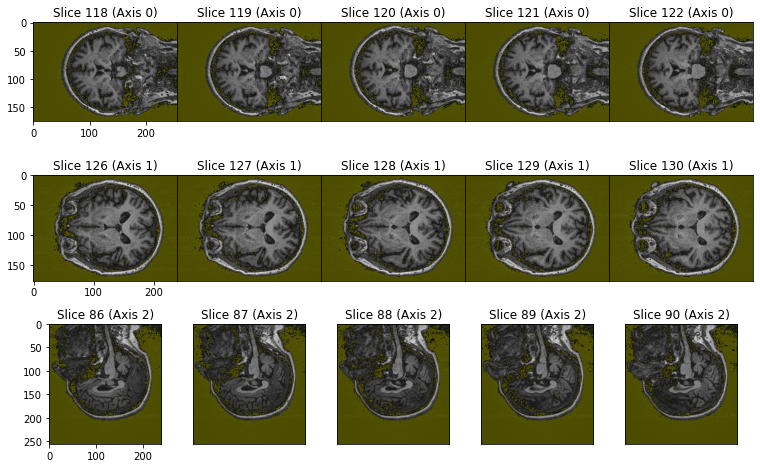

In [96]:
for ds,mrs in rand_mrs.items():
    mr = np.asarray(mrs[0])
    mk = mr<=mr.mean()//2
    
    mids = get_mid_idx(mr.shape, 5)
   
    viz_axis(np_arr = mr, \
            bin_mask_arr = mk,
            slices=lrange(*mids[0]), fixed_axis=0, \
            axis_fn = np.rot90, \
            title   = "Axis 0", \

            np_arr_b = mr, \
            slices_b = lrange(*mids[1]), fixed_axis_b=1, \
            title_b  = "Axis 1", \

            np_arr_c = mr, \
            slices_c = lrange(*mids[2]), fixed_axis_c=2, \
            title_c = "Axis 2", \
  
        ncols = 5, hspace=0.3, fig_mult=2)

In [65]:
    otsu_filter = sitk.OtsuThresholdImageFilter()
    otsu_filter.SetInsideValue(0)
    otsu_filter.SetOutsideValue(1)
    #otsu_filter.SetNumberOfHistogramBins(200)
    
    seg = otsu_filter.Execute(sitk.ReadImage(v, sitk.sitkFloat32))

    print(otsu_filter.GetThreshold() )

RuntimeError: Exception thrown in SimpleITK ImageSeriesReader_Execute: /tmp/SimpleITK-build/ITK/Modules/Core/Common/src/itkDataObject.cxx:355:
Requested region is (at least partially) outside the largest possible region.

In [ ]:
seg = otsu_filter.Execute(img_T1)
myshow(sitk.LabelOverlay(img_T1_255, seg), "Otsu Thresholding")

print(otsu_filter.GetThreshold() )